In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from util import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import math
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [2]:
raw_data = pd.read_csv("raw_data_new.csv", parse_dates=[0], index_col=0)
raw_data

,pm25,t2m,d2m,u10,v10,sp,t500,t850,t1000,q500,...,q1000,u500,u850,u1000,v500,v850,v1000,w500,w850,w1000
2014-01-01 08:00:00,51.0,270.487368,258.980250,2.507680,-0.658156,97997.728951,248.554676,270.020533,276.617789,0.000131,...,0.001265,23.046411,10.548611,3.180156,-20.240968,-9.274819,-0.819754,-0.362159,0.270265,0.257394
2014-01-01 14:00:00,23.0,283.838611,258.241520,3.154037,-0.050984,98048.881796,249.264215,270.571515,282.831868,0.000194,...,0.001557,23.175371,8.060430,3.081539,-16.076533,-5.246438,0.187835,-0.213867,0.326162,0.170515
2014-01-01 20:00:00,66.0,273.009328,261.723400,1.842218,-1.248453,98354.616140,248.722481,271.406578,282.505506,0.000195,...,0.001777,23.576161,6.588762,1.987903,-10.424377,-6.522191,-1.084960,-0.113473,0.107447,0.193131
2014-01-02 02:00:00,127.0,270.101179,262.794066,0.369782,-1.550008,98568.984998,248.943138,271.072288,278.768867,0.000185,...,0.001637,18.130736,5.157552,0.032000,-7.689495,-0.974540,-2.949295,0.033899,-0.050130,0.173733
2014-01-02 08:00:00,119.0,268.554291,262.665035,0.382165,-1.082520,98565.141143,248.187354,271.501711,275.817080,0.000187,...,0.001611,17.444210,7.410570,0.221648,-2.653525,2.969054,-1.754386,0.091726,-0.135630,0.127581
2014-01-02 14:00:00,108.0,281.021141,262.805886,1.372043,0.864305,98220.376883,249.590576,273.640898,279.917078,0.000165,...,0.001549,22.720216,8.290536,1.422752,-4.169837,1.569078,0.806979,0.041438,0.067731,0.040518
2014-01-02 20:00:00,168.0,274.254307,263.928755,1.946937,-1.228454,98300.802165,249.183615,272.620853,281.459036,0.000551,...,0.001680,17.466968,6.941507,2.047326,-1.737625,-6.505430,-1.026792,-0.127448,0.222734,0.176215
2014-01-03 02:00:00,122.0,273.074404,262.622681,1.463319,-2.884348,98494.769021,247.280942,271.582311,278.024974,0.000362,...,0.001649,15.818295,2.872926,2.037211,-3.809984,-11.719848,-4.760390,-0.027514,0.467191,0.325794
2014-01-03 08:00:00,30.0,270.140652,260.127744,0.696676,-2.797163,98825.044903,245.507756,269.041449,273.967259,0.000186,...,0.001449,9.958174,-4.042902,1.067478,-8.480185,-10.603811,-4.742644,0.099449,0.074810,0.313658
2014-01-03 14:00:00,16.0,280.057803,259.841117,0.031922,-1.408137,98795.476785,245.383553,267.792819,278.764903,0.000231,...,0.001501,8.070545,0.350609,0.160961,-9.105245,-4.878698,-1.426081,0.152680,-0.017033,0.089704


In [3]:
# Setting parameters
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 8
predict_hours = 3
n_features = 21

In [4]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(raw_data)
reframed = series_to_supervised(scaled, lag_hours, predict_hours)

In [5]:
# Turn off shuffle, because it's a sequense model!!!
train, test = train_test_split(reframed.values, train_size=0.8, test_size=0.2, shuffle=False)
train_X = train[:, :n_features*lag_hours]

# select the pm25 data we want to predict
pm25_select = []
for i in range(predict_hours , 0, -1):
    pm25_select.append(-n_features * i)
    
train_y = train[:, pm25_select]
test_X = test[:, :n_features*lag_hours]
test_y = test[:, pm25_select]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4382, 168) (4382, 3) (1096, 168) (1096, 3)


In [6]:
train_X = train_X.reshape(train_X.shape[0], lag_hours, 21)
test_X = test_X.reshape(test_X.shape[0], lag_hours, 21)

In [7]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 4382 samples, validate on 1096 samples
Epoch 1/100
 - 1s - loss: 0.1024 - val_loss: 0.1021
Epoch 2/100
 - 1s - loss: 0.0979 - val_loss: 0.0887
Epoch 3/100
 - 1s - loss: 0.0824 - val_loss: 0.0531
Epoch 4/100
 - 1s - loss: 0.0741 - val_loss: 0.0750
Epoch 5/100
 - 1s - loss: 0.0741 - val_loss: 0.0545
Epoch 6/100
 - 1s - loss: 0.0696 - val_loss: 0.0656
Epoch 7/100
 - 1s - loss: 0.0720 - val_loss: 0.0459
Epoch 8/100
 - 1s - loss: 0.0677 - val_loss: 0.0503
Epoch 9/100
 - 1s - loss: 0.0682 - val_loss: 0.0841
Epoch 10/100
 - 1s - loss: 0.0742 - val_loss: 0.0518
Epoch 11/100
 - 1s - loss: 0.0663 - val_loss: 0.0494
Epoch 12/100
 - 1s - loss: 0.0644 - val_loss: 0.0505
Epoch 13/100
 - 1s - loss: 0.0658 - val_loss: 0.0632
Epoch 14/100
 - 1s - loss: 0.0678 - val_loss: 0.0424
Epoch 15/100
 - 1s - loss: 0.0651 - val_loss: 0.0429
Epoch 16/100
 - 1s - loss: 0.0630 - val_loss: 0.0475
Epoch 17/100
 - 1s - loss: 0.0628 - val_loss: 0.0602
Epoch 18/100
 - 1s - loss: 0.0655 - val_loss: 0.0419
Epoch 1

In [8]:
# inverse transform
def inv_normalization(y, predict_hours):
    if len(y.shape) == 1:
        y = y[:, np.newaxis]
        print(y.shape)
        
    inv_y = np.copy(y)
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = y[:, i]
        y_ = y_.reshape(len(y), 1)
        raw_ = np.tile(y_, (1, 21))
        inv_ = scaler.inverse_transform(raw_)
        inv_y[:, i] = inv_[:, 0]
    return inv_y

In [9]:
ypredict = model.predict(test_X)

In [10]:
pm25_predict = inv_normalization(ypredict, predict_hours)
pm25_actual = inv_normalization(test_y, predict_hours)

In [23]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
22.51953886019705
rmse:
35.991887932001006
predict_hours 1
mae:
28.511499767701554
rmse:
44.224471029415156
predict_hours 2
mae:
28.694568321305958
rmse:
47.105613314238994


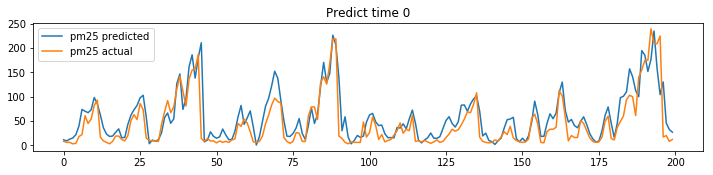

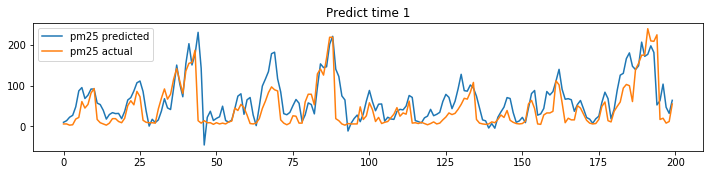

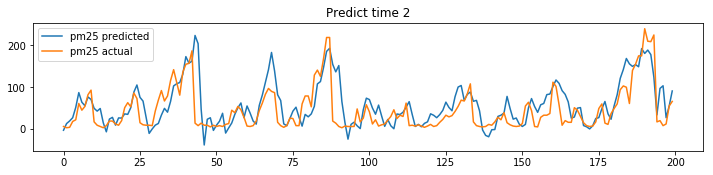

In [21]:
# Plot for LSTM
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

## Linear model

In [13]:
from sklearn import linear_model

In [14]:
# linear regression
train_X_reshaped = train_X.reshape((train_X.shape[0], train_X.shape[1] * train_X.shape[2]))

reg = linear_model.LinearRegression()
reg.fit(train_X_reshaped, train_y)
y_predict_lr = reg.predict(test_X.reshape((test_X.shape[0], test_X.shape[1] * test_X.shape[2])))

pm25_predict_lr = inv_normalization(y_predict_lr, predict_hours)


In [24]:
for i in range(predict_hours):
    print("predict_hours " + str(i))
    print("mae:")
    print(mean_absolute_error(pm25_predict_lr[:, i], pm25_actual[:, i]))
    print("rmse:")
    print(math.sqrt(mean_squared_error(pm25_predict_lr[:, i], pm25_actual[:, i])))

predict_hours 0
mae:
26.580198387876433
rmse:
39.16174113371231
predict_hours 1
mae:
34.5751452156199
rmse:
49.11368610067947
predict_hours 2
mae:
39.83204964308889
rmse:
54.77784801775598


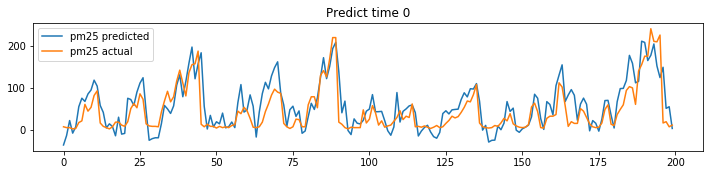

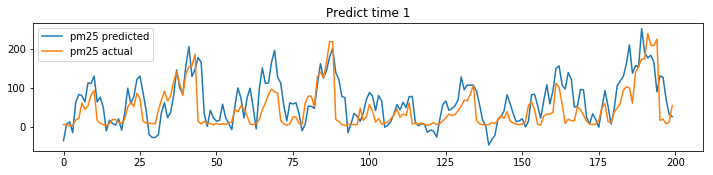

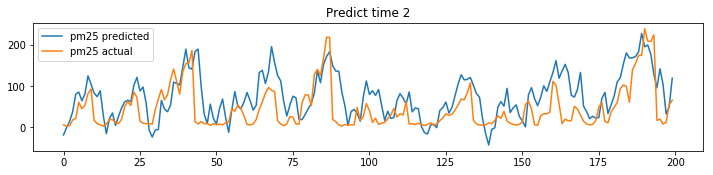

In [20]:
# Plot for linear regression
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict_lr[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [24]:
t = np.tile(ypredict,(1,5))

In [167]:
train_y.shape

(2131, 1)

In [108]:
ypredict.shape

(532, 3)

In [121]:
pm25_actual.shape

(532, 3)

In [116]:
pm25_predict[:,1]

array([ 0.02512626,  0.13157386,  0.42580077,  0.01957737,  0.06231519,
        0.02118389,  0.16410474,  0.05062803,  0.07270921,  0.01696643,
        0.13278526,  0.10435077,  0.05019544,  0.17845559,  0.05315086,
        0.07699878,  0.03578535,  0.20254955,  0.00799736,  0.03828513,
        0.03645626, -0.02934895,  0.07096433,  0.05544633,  0.00306354,
       -0.00184802,  0.0489907 ,  0.045976  ,  0.08306812,  0.26169065,
        0.06274786,  0.05632127,  0.28027174,  0.06150862,  0.03163888,
        0.01078969,  0.02413501,  0.1811978 ,  0.03442261,  0.07689123,
        0.03582137,  0.11131186, -0.00857573,  0.07133815,  0.09203243,
        0.09898623,  0.04388558,  0.06305756,  0.04395104,  0.1310133 ,
        0.08464725,  0.02060915,  0.2815719 ,  0.10502711,  0.14615808,
        0.05662401,  0.06258877,  0.05891931,  0.07595711,  0.13015519,
        0.34132555,  0.04103775,  0.38648757,  0.19144152,  0.01765127,
        0.01077341,  0.23759626,  0.16167738,  0.01709972,  0.15